<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignment 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [11]:
from tensorflow.keras.datasets import boston_housing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import numpy as np


(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
np.random.seed(42)

57344/57026 [==============================] - 0s 0us/step


In [12]:
MinMax = MinMaxScaler()
X = MinMax.fit_transform(train_data)
X_test = MinMax.fit_transform(test_data)

y = train_targets
y_test = test_targets

In [13]:
model = Sequential(name='Boston_Housing')
model.add(Dense(50, input_dim=13, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(50, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "Boston_Housing"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 5,851
Trainable params: 5,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(X,y, epochs=50, verbose=False, validation_split=0, validation_data=(X_test, y_test))
model.evaluate(X,y)
history.history.keys()

13/13 [==============================] - 0s 2ms/step - loss: 12.4850


dict_keys(['loss', 'val_loss'])

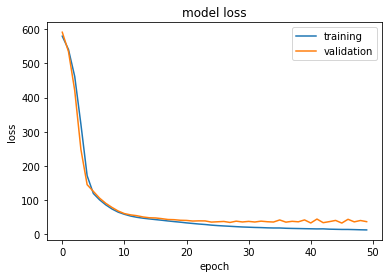

In [15]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


model_2 = LinearRegression()
model_2.fit(X, y)
print('model_2 training data linear regression:', mean_squared_error(model_2.predict(X), y))
print('model training data neural network:', mean_squared_error(model.predict(X), y))
print()
print('model_2 test data linear regression:', mean_squared_error(model_2.predict(X_test), y_test))
print('model test data neural network:', mean_squared_error(model.predict(X_test), y_test))

model_2 training data linear regression: 22.00480083834814
model training data neural network: 12.48502476117887

model_2 test data linear regression: 40.60145446671504
model test data neural network: 36.96411851161629


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- The number of nodes in your output layer should equal the number of classes you want to predict for Fashion-MNIST.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [44]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
img_rows, img_cols = 28, 28

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

x_train = x_train / 255
x_test = x_test / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
y_test.shape

(10000, 10)

In [52]:
model3 = Sequential(name='MNIST_Fashion')
model3.add(Dense(100, input_dim=784, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(100, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(100, activation="relu"))
model3.add(Dropout(0.2))
model3.add(Dense(10, activation="softmax"))
model3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
model3.summary()

Model: "MNIST_Fashion"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 100)               78500     
_________________________________________________________________
dropout_21 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)              

In [58]:
history = model3.fit(x_train,y_train, epochs=40, verbose=True, validation_split=0, validation_data=(x_test, y_test))

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2705 - accuracy: 0.9007 - val_loss: 0.3366 - val_accuracy: 0.8815
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9011 - val_loss: 0.3430 - val_accuracy: 0.8817
Epoch 3/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2689 - accuracy: 0.9006 - val_loss: 0.3259 - val_accuracy: 0.8894
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2662 - accuracy: 0.9024 - val_loss: 0.3286 - val_accuracy: 0.8878
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2655 - accuracy: 0.9018 - val_loss: 0.3341 - val_accuracy: 0.8878
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2641 - accuracy: 0.9025 - val_loss: 0.3316 - val_accuracy: 0.8906
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2632 - accuracy: 0.9024 - val_loss: 0.3398 - val_accuracy:

In [59]:
model3.evaluate(x_train,y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1788 - accuracy: 0.9310


[0.1787816435098648, 0.9310166835784912]

In [60]:
model3.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.8860


[0.3584592640399933, 0.8859999775886536]

In [61]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

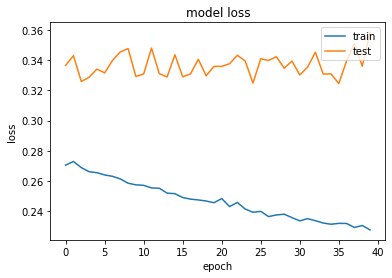

In [62]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

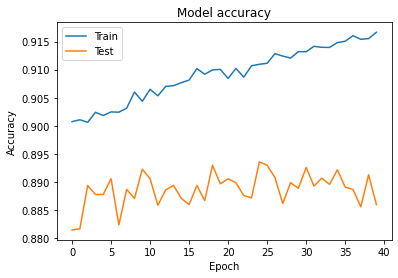

In [63]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.